# Main program GAIA-NIR

## Purpose

The main program handles the overall simulation flow by calling methods from the Spectrum and Parameters classes.\
The Spectrum class encapsulates all spectrum-related operations, including loading, processing, and saving the spectrum. \
The Parameters class handles configuration.


## Version History
- **v9.0**: Update: 

- Parameter Class modification to now utilize Pydantic


Last Edited: 2025-03-17


## Flowchart of first overview of program

## Main program


In [25]:
from spectrum import Spectrum
from parameters import Parameters
import logging
import os

logging.basicConfig(
    level=logging.INFO,
    format="[%(funcName)s] %(message)s",)

In [ ]:
def main():
    """
    Main function to control the simulation flow.
    """
    params = Parameters.load_from_json()
    params.save_to_json()

    spectrum = Spectrum()
    spectrum.load_spectrum(params.input_file)
    spectrum.convert_units(parameters=params)

    if params.apply_convolution:
        spectrum.convolve_spectrum(parameters=params)
    
    if params.apply_resampling:
        spectrum.resample_spectrum(parameters=params)

    #WARNING: Using 100th percentile for our synthetic spectra
    #For real spectra, percentile should depend on SNR to be implemented, if necessary.
    spectrum.rescale_flux(parameters=params)

    base_name = os.path.splitext(os.path.basename(params.input_file))[0]
    
    original = spectrum.copy()
    for i in range(params.num_output_spectra):
        spectrum = original.copy()  
        logging.info("-" * 70)  
        logging.info(f"Starting iteration {i+1}/{params.num_output_spectra}")
        #Rad Vel not implemented for now.
        spectrum.radial_velocity_shift(parameters = params)  
        spectrum.resample_stochastic(parameters = params)  
        spectrum.generate_noise(parameters = params)  
        spectrum.save_spectrum(base_name=base_name, snr=params.snr, index=i+1)

    logging.info(f"Simulation complete.")


[save_to_json] Parameters saved to 'config.json'
[load_spectrum] Loaded spectrum from 'gaia_055000450000.txt' successfully.
[convert_units] Converted units from nm to Ångströms.
[convolve_spectrum] Sigma wavelength units: 0.32 Å, pixel units: 31.94
[convolve_spectrum] Gaussian convolution completed.
[convolve_spectrum] Flux before & after convolution: 1887597561.000 | 1887597438.861
[convolve_spectrum] [convolve_spectrum] Flux conservation ratio: 1.000000


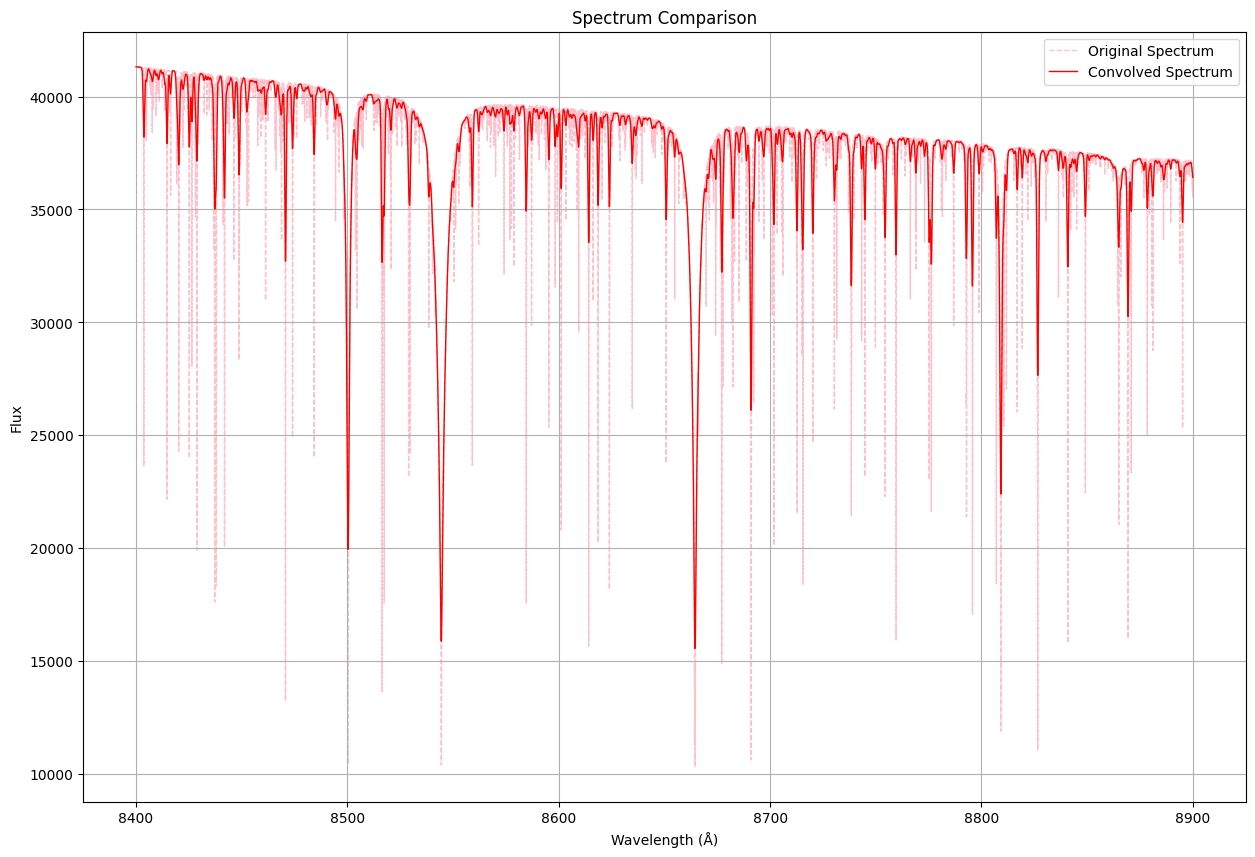

[resample_spectrum] Resampling completed.
[resample_spectrum] First: 8400.01 Å, Center:8649.885000000475 Å, Last: 8899.76 Å
[resample_spectrum] Pixel size: 0.25 Å, New grid points: 2000.


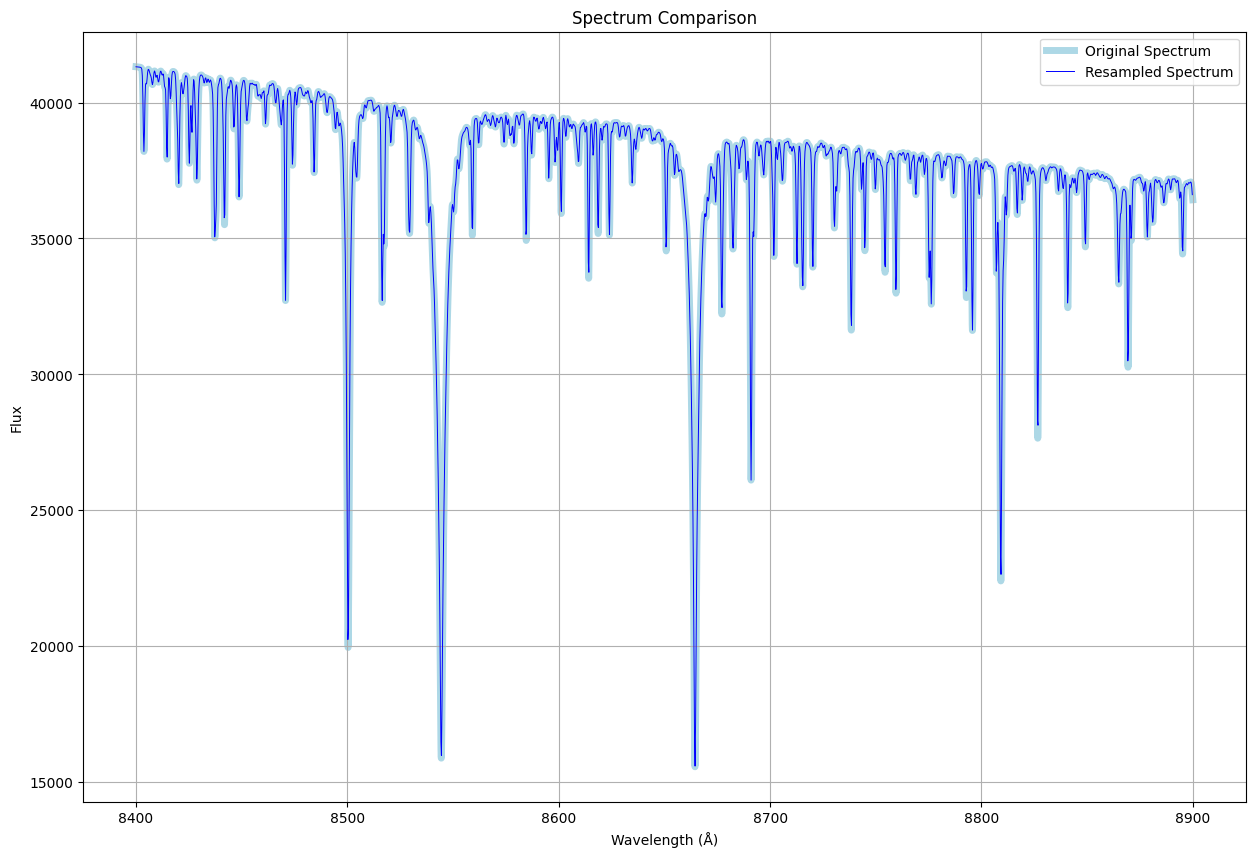

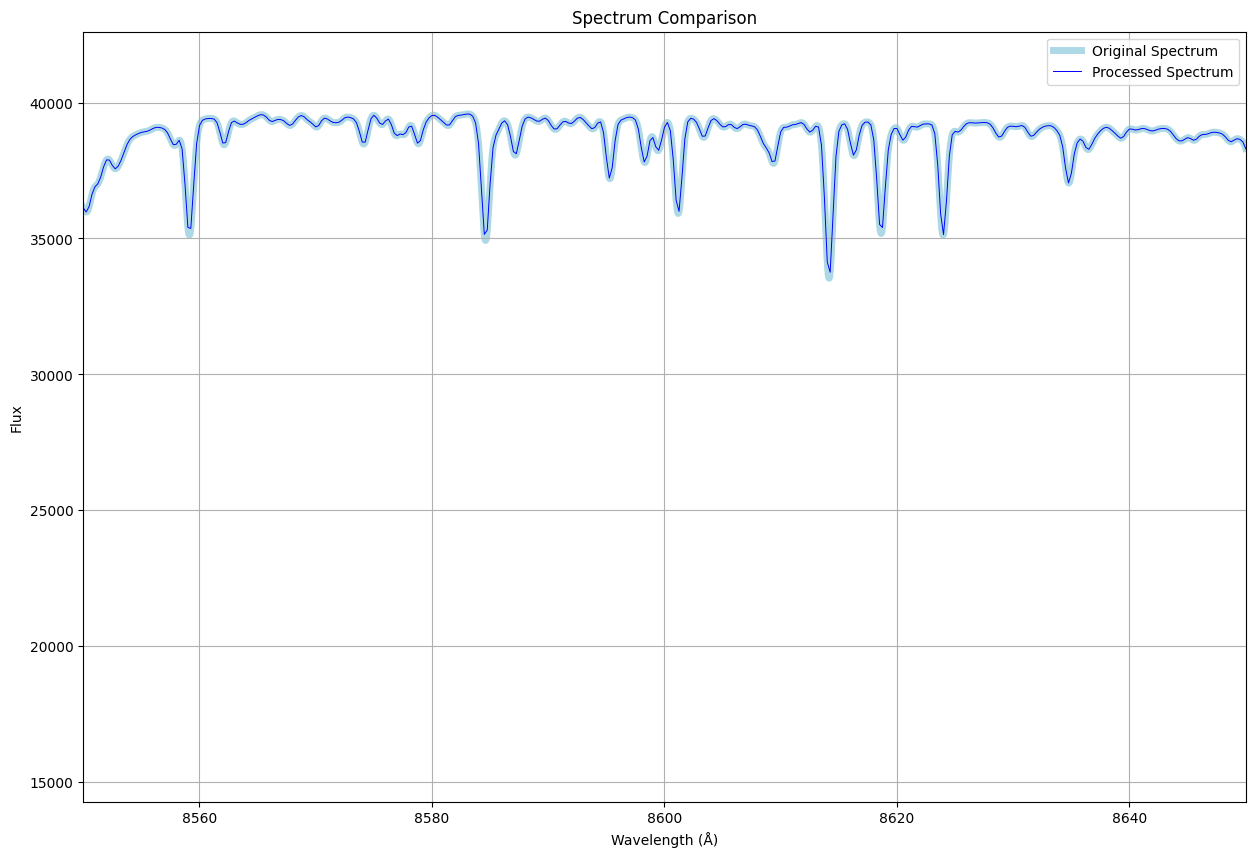

[rescale_flux] Reference flux level before: 39578.251
[rescale_flux] Max flux after: 22500.000
[rescale_flux] Rescaling completed.


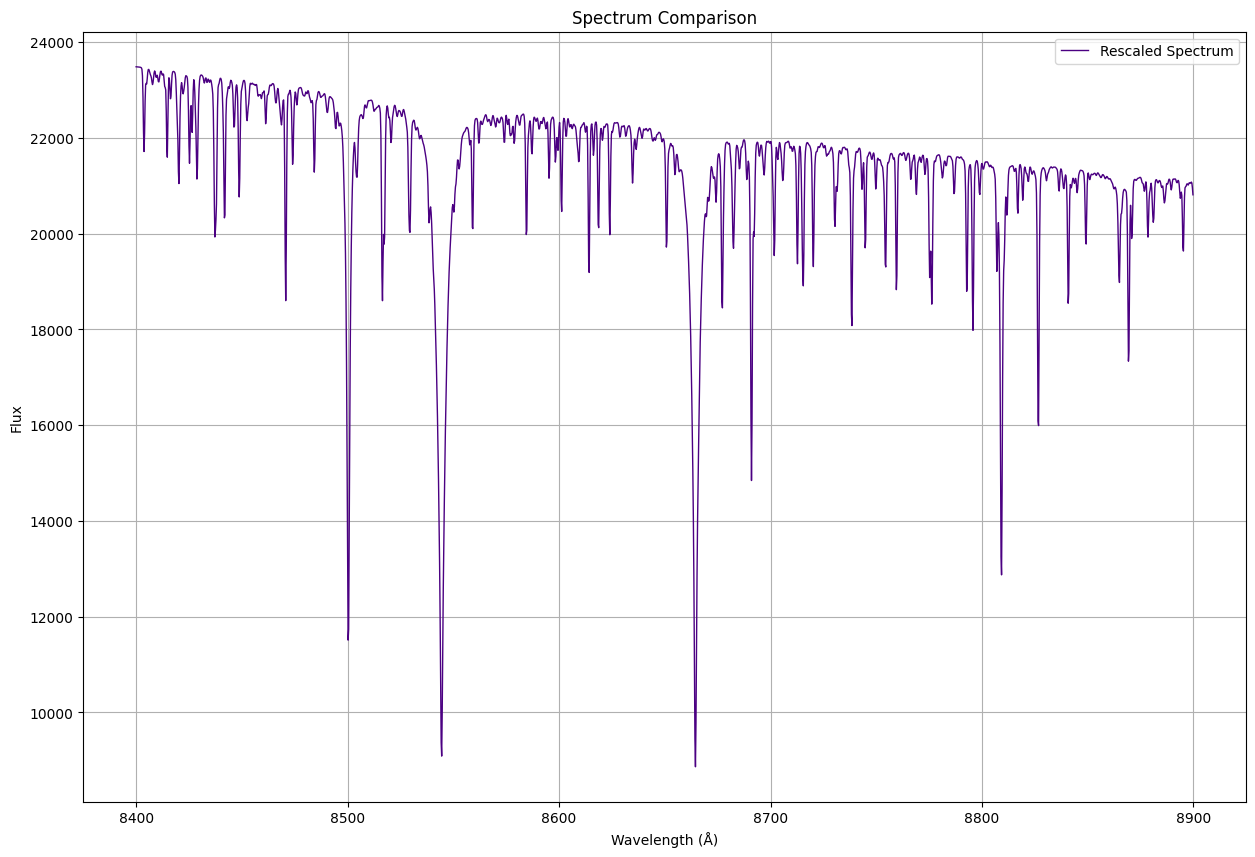

[main] ----------------------------------------------------------------------
[main] Starting iteration 1/1
[radial_velocity_shift] Applying radial velocity shift
[resample_stochastic] Resampling spectrum for stochastic process
[resample_stochastic] Trimmed wavelength range: 8459.01 Å to 8700.76 Å
[resample_stochastic] Number of points after trimming: 968


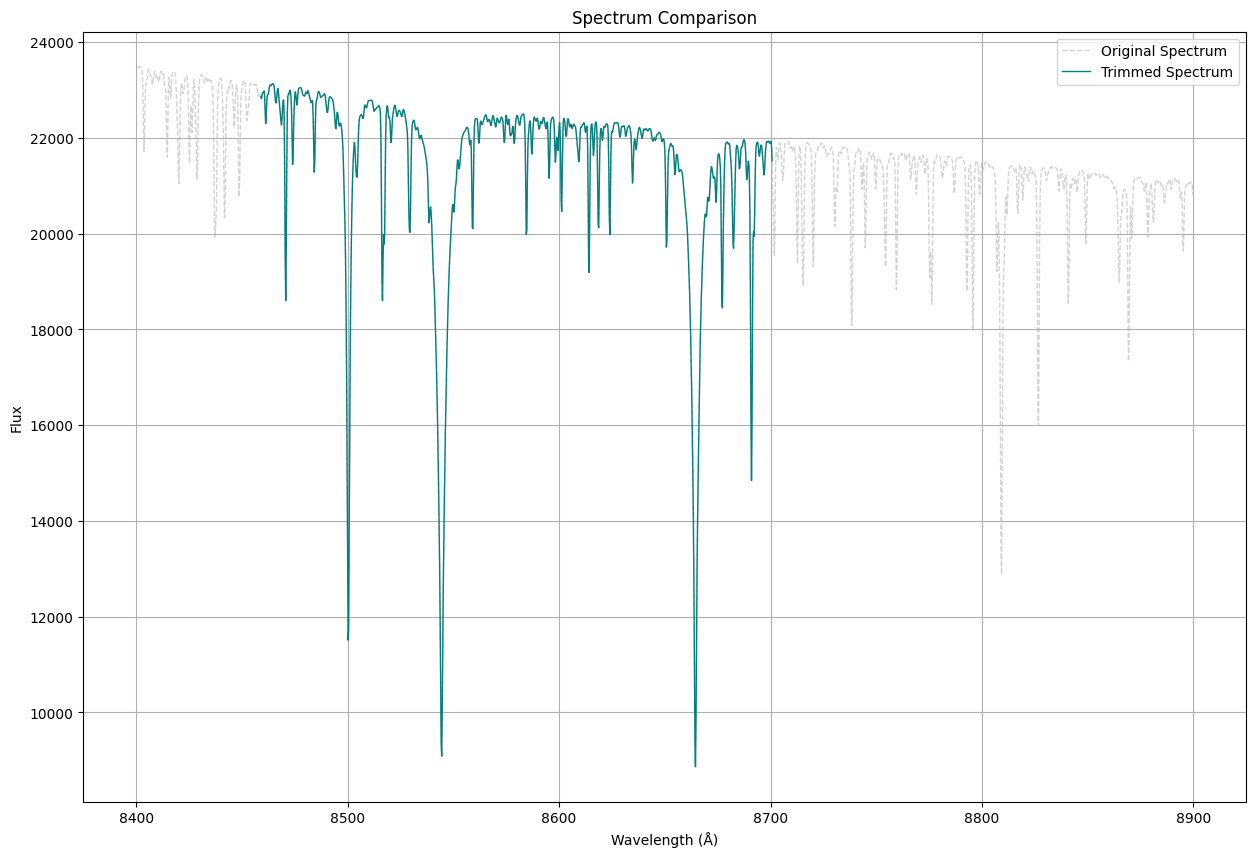

[generate_noise] Noise Generation Completed.
[generate_noise] Mean: 21466.33, std: 2040.11, estimated snr : 10.52
[save_spectrum] Spectrum saved to 'outputs\SNR150\gaia_055000450000_snr150_0001.txt'.
[main] Simulation complete.


In [27]:
main()